In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.metrics import mean_squared_error,r2_score

Reading

In [22]:
data = pd.read_csv('car_age_price.csv')
data_copy=data
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


checking data

In [23]:
data.describe().round(2)

,Year,Price
count,112.00,112.00
mean,2016.67,483866.04
std,1.63,91217.45
min,2013.00,300000.00
25%,2015.00,423750.00
50%,2017.00,500000.00
75%,2017.00,550000.00
max,2020.00,755000.00


price starts from 300000 to 755000

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [25]:
data.isna().sum()

Year     0
Price    0
dtype: int64

In [26]:
data.duplicated().count()

112

checking correlation

           Year     Price
Year   1.000000  0.776302
Price  0.776302  1.000000


<AxesSubplot:>

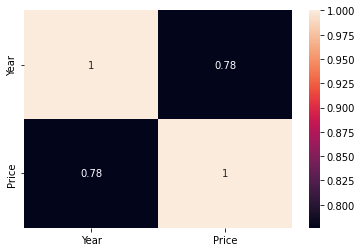

In [28]:
print(data.corr())
sns.heatmap(data.corr(),annot=True)

This is a good correlation 

(array([12.,  8., 12., 13., 32., 23.,  7.,  2.,  2.,  1.]),
 array([300000., 345500., 391000., 436500., 482000., 527500., 573000.,
        618500., 664000., 709500., 755000.]),
 <BarContainer object of 10 artists>)

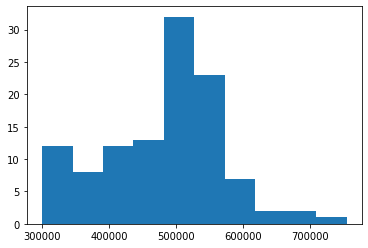

In [30]:
plt.hist(data['Price'])

This is normal distribution

plotting

<AxesSubplot:xlabel='Price', ylabel='Year'>

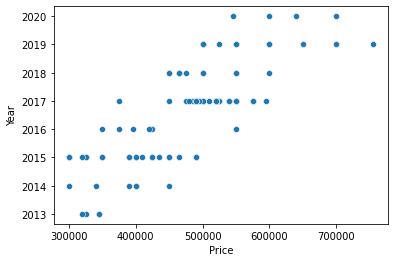

In [31]:
sns.scatterplot(data=data,x='Price',y='Year')

price of car and year is directly proportional

for checking outliers in price value

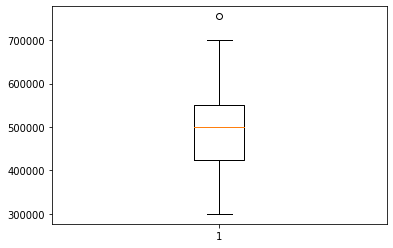

In [32]:
plt.boxplot(data['Price'])
plt.show()

These outliers have to be be replaced by mean since this is a normal distribution

Inter quartile range

In [33]:
from sklearn.utils import DataConversionWarning
IQR=stats.iqr(data['Price'])
Q1=data['Price'].quantile(0.25)
Q3=data['Price'].quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR

Lower outliers=

In [35]:
data.loc[data.Price<min_limit]

,Year,Price


Upper outliers

In [37]:
data.loc[data.Price>max_limit]

,Year,Price
1,2019,755000


Replacing outliers with mean value of price

In [41]:
data.loc[data['Price']>max_limit,'Price']=np.mean(data.Price)

Looking for outliers in the year

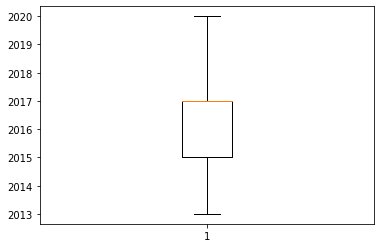

In [42]:
plt.boxplot(data['Year'])
plt.show()

as we can see there is no outliers

Mkaing linear model and predicting

In [46]:
x=data.drop(['Price'],axis=1)
y=data['Price']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state= 42 , test_size = 0.2)
lr = LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)

MSE and R^2 for model

In [50]:
print( ' Mean square eror = ',mean_squared_error(y_test,predictions).round(3))
print(' R squared value = ', r2_score(y_test,predictions).round(3))

 Mean square eror =  3856389421.844
 R squared value =  0.436


predicting

In [52]:
year=[[2022]]
y_pred = lr.predict(year).round(2)
print('The value of car in year 2022 = ',y_pred)


The value of car in year 2022 =  [723904.33]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


LASSO model

In [55]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 10)
lasso.fit(x_train,y_train)
train_score_ls =lasso.score(x_train,y_train).round(3)
test_score_ls =lasso.score(x_test,y_test).round(3)

print("Train score for lasso model is {}".format(train_score_ls))
print("Test score for lasso model is {}".format(test_score_ls))
prediction=lasso.predict([[2022]]).round(2)
print('Car price in 2022 will be : ',prediction)

Train score for lasso model is 0.619
Test score for lasso model is 0.436
Car price in 2022 will be :  [723881.92]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


The price prediction results by methods of linear regression model and Lasso model are 7,23,904 and 723,881.9 respectively. both are equilent.